In [ ]:
#from google.colab import files
#uploaded = files.upload()


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import Normalizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

**Verilerin Yüklenmesi**

In [ ]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test_x.csv')

In [ ]:
train_df

,index,Cinsiyet,Yaş Grubu,Medeni Durum,Eğitim Düzeyi,İstihdam Durumu,Yıllık Ortalama Gelir,Yaşadığı Şehir,En Çok İlgilendiği Ürün Grubu,Yıllık Ortalama Satın Alım Miktarı,Yıllık Ortalama Sipariş Verilen Ürün Adedi,Eğitime Devam Etme Durumu,Öbek İsmi,Yıllık Ortalama Sepete Atılan Ürün Adedi
0,0,Kadın,31-40,Bekar,Yüksek Lisans Mezunu,Düzenli ve Ücretli Bir İşi Var,748266.440879,Büyük Şehir,Elektronik ve Teknolojik Ürünler,32010.900881,37.310644,Etmiyor,obek_4,102.936904
1,1,Erkek,>60,Evli,Lise Mezunu,Kendi İşinin Sahibi,246298.609605,Küçük Şehir,Spor Malzemeleri,4145.729891,11.554851,Etmiyor,obek_5,82.176053
2,2,Erkek,18-30,Bekar,Lise Mezunu,Düzenli ve Ücretli Bir İşi Var,268582.732360,Küçük Şehir,Giyim,9924.379414,55.353236,Ediyor,obek_8,141.661426
3,3,Erkek,51-60,Evli,Lise Mezunu,Kendi İşinin Sahibi,327721.837865,Kırsal,Giyim,6417.780714,15.417239,Etmiyor,obek_3,17.097397
4,4,Erkek,31-40,Evli,Ortaokul Mezunu,İşsiz veya Düzenli Bir İşi Yok,397431.626948,Büyük Şehir,Giyim,7886.663061,14.689837,Etmiyor,obek_3,20.470459
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5455,5455,Kadın,>60,Bekar,Üniversite Mezunu,Emekli,478054.247819,Köy veya Kasaba,Kozmetik,43182.299801,31.356284,Etmiyor,obek_6,51.600436
5456,5456,Erkek,51-60,Evli,Doktora Ötesi,Kendi İşinin Sahibi,481852.853651,Köy veya Kasaba,Ev ve Mobilya,42107.996193,26.288620,Etmiyor,obek_6,49.190536
5457,5457,Kadın,51-60,Evli,İlkokul Mezunu,Düzenli ve Ücretli Bir İşi Var,309443.687351,Küçük Şehir,Ev ve Mobilya,4655.392445,5.156906,Etmiyor,obek_1,9.537384
5458,5458,Kadın,18-30,Bekar,Yüksekokul Mezunu,Düzenli ve Ücretli Bir İşi Var,266604.268016,Büyük Şehir,Ev ve Mobilya,9016.165906,39.205399,Ediyor,obek_8,143.281718


In [ ]:
test_df

,index,Cinsiyet,Yaş Grubu,Medeni Durum,Eğitim Düzeyi,İstihdam Durumu,Yıllık Ortalama Gelir,Yaşadığı Şehir,En Çok İlgilendiği Ürün Grubu,Yıllık Ortalama Satın Alım Miktarı,Yıllık Ortalama Sipariş Verilen Ürün Adedi,Eğitime Devam Etme Durumu,Yıllık Ortalama Sepete Atılan Ürün Adedi
0,0,Erkek,51-60,Evli,Yüksek Lisans Mezunu,Düzenli ve Ücretli Bir İşi Var,365331.930346,Köy veya Kasaba,Giyim,5566.587664,15.442635,Etmiyor,19.646460
1,1,Erkek,41-50,Bekar,Lise Mezunu,İşsiz veya Düzenli Bir İşi Yok,414899.236174,Büyük Şehir,Spor Malzemeleri,6756.766203,14.957246,Etmiyor,19.675863
2,2,Kadın,>60,Evli,Eğitimsiz,İşsiz veya Düzenli Bir İşi Yok,152825.872271,Küçük Şehir,Giyim,4493.915682,10.907930,Etmiyor,46.904518
3,3,Kadın,51-60,Evli,Doktora Ötesi,Düzenli ve Ücretli Bir İşi Var,489052.908472,Köy veya Kasaba,Kozmetik,42670.646595,32.333021,Etmiyor,48.083609
4,4,Erkek,18-30,Evli,Yüksek Lisans Mezunu,Kendi İşinin Sahibi,323635.711534,Küçük Şehir,Giyim,5959.266948,4.519968,Etmiyor,12.752491
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2335,2335,Kadın,18-30,Bekar,Yüksekokul Mezunu,Kendi İşinin Sahibi,259190.078834,Küçük Şehir,Ev ve Mobilya,9559.156534,41.883661,Ediyor,117.627785
2336,2336,Kadın,31-40,Evli,Lise Mezunu,İşsiz veya Düzenli Bir İşi Yok,194580.563177,Kırsal,Ev ve Mobilya,4070.232154,20.082996,Etmiyor,45.659622
2337,2337,Erkek,>60,Evli,Yüksek Lisans Mezunu,Düzenli ve Ücretli Bir İşi Var,357730.521969,Büyük Şehir,Ev ve Mobilya,22589.204381,18.922305,Etmiyor,100.691379
2338,2338,Erkek,18-30,Evli,Doktora Ötesi,Düzenli ve Ücretli Bir İşi Var,213179.637202,Küçük Şehir,Spor Malzemeleri,4205.390562,10.758108,Etmiyor,97.778913


**Öbeklerde Bulunan Kişi Sayısı**

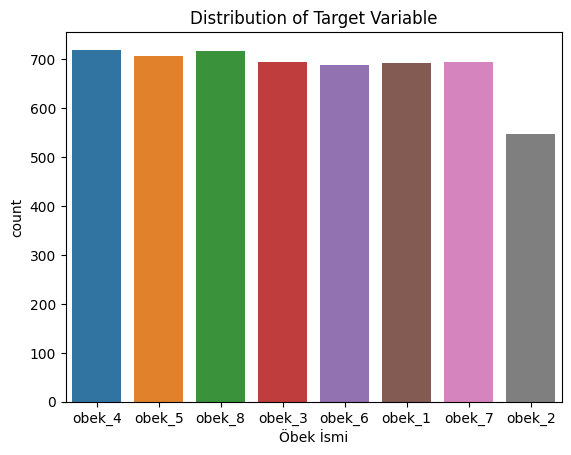

In [ ]:
sns.countplot(x='Öbek İsmi', data=train_df)
plt.title('Distribution of Target Variable')
plt.show()

*  Öbek 2 sayısı biraz az olsada dengeli bi veri seti

**Sayısal Özelliklerin Korelasyon Isı Haritası**



*   Bu grafik yeni Öz Nitelikler oluşturma konusunda bazı fikirler verdi.




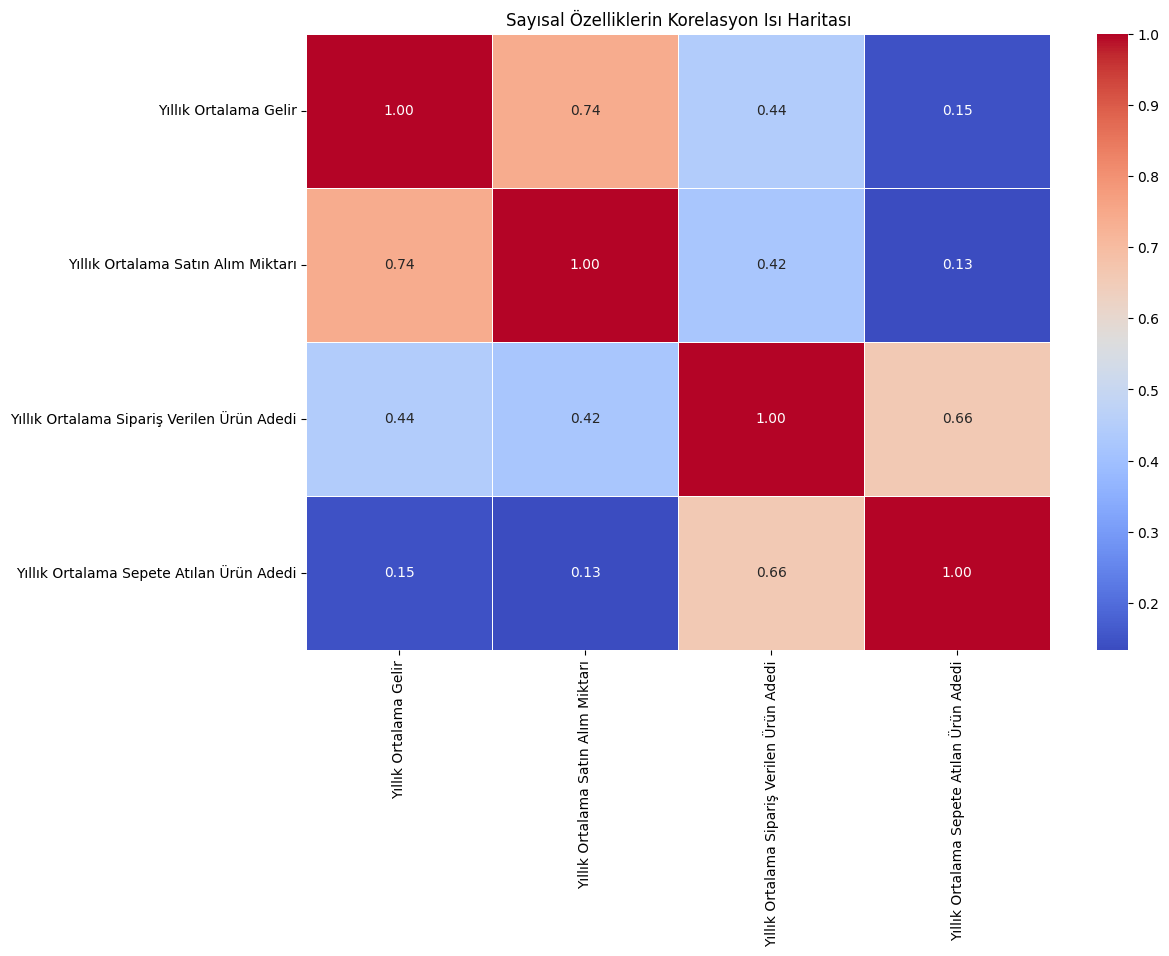

In [ ]:
numerical_features = ['Yıllık Ortalama Gelir', 'Yıllık Ortalama Satın Alım Miktarı', 'Yıllık Ortalama Sipariş Verilen Ürün Adedi', 'Yıllık Ortalama Sepete Atılan Ürün Adedi']
correlation_matrix = train_df[numerical_features].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")
plt.title('Sayısal Özelliklerin Korelasyon Isı Haritası')
plt.show()

**Öbeklere Bağlı Olarak Niteliklerin Grafiklerinin Oluşturulması**

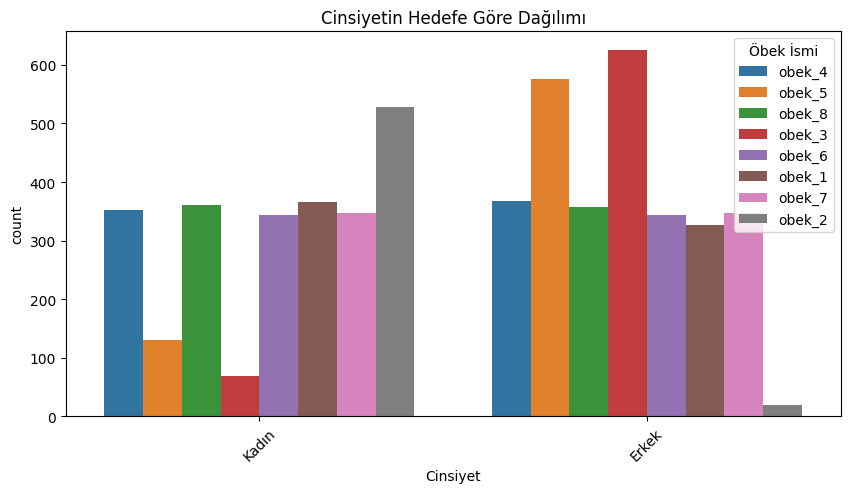

In [ ]:


categorical_features = ['Cinsiyet', 'Yaş Grubu', 'Medeni Durum', 'Eğitim Düzeyi', 'İstihdam Durumu', 'Yaşadığı Şehir', 'En Çok İlgilendiği Ürün Grubu', 'Eğitime Devam Etme Durumu']

plt.figure(figsize=(10, 5))
sns.countplot(x=categorical_features[0], data=train_df, hue='Öbek İsmi')
plt.title(f'{categorical_features[0]}in Hedefe Göre Dağılımı')
plt.xticks(rotation=45)
plt.show()




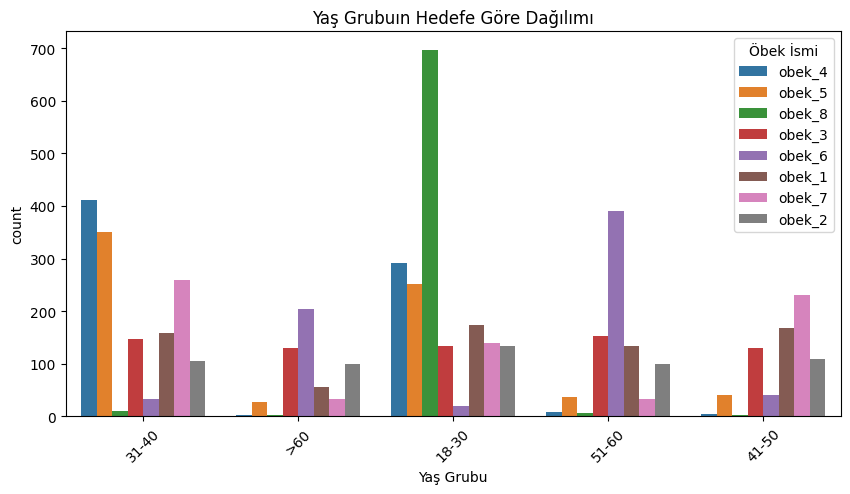

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(x=categorical_features[1], data=train_df, hue='Öbek İsmi')
plt.title(f'{categorical_features[1]}ın Hedefe Göre Dağılımı')
plt.xticks(rotation=45)
plt.show()

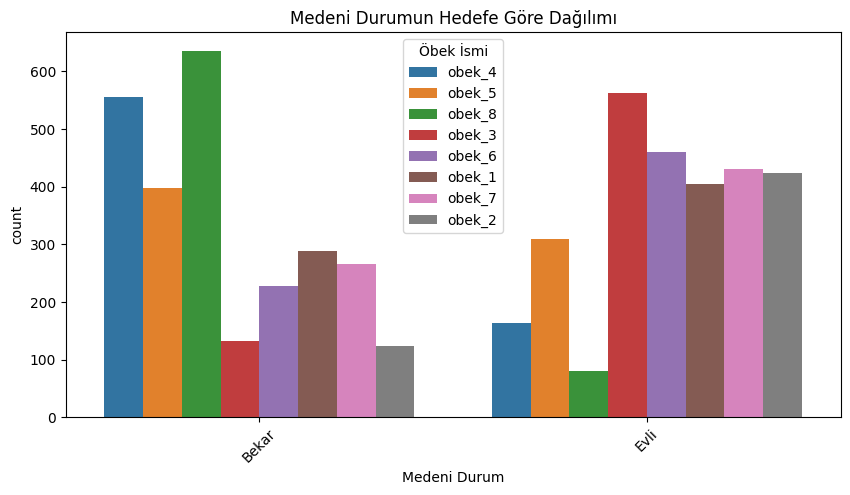

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(x=categorical_features[2], data=train_df, hue='Öbek İsmi')
plt.title(f'{categorical_features[2]}un Hedefe Göre Dağılımı')
plt.xticks(rotation=45)
plt.show()

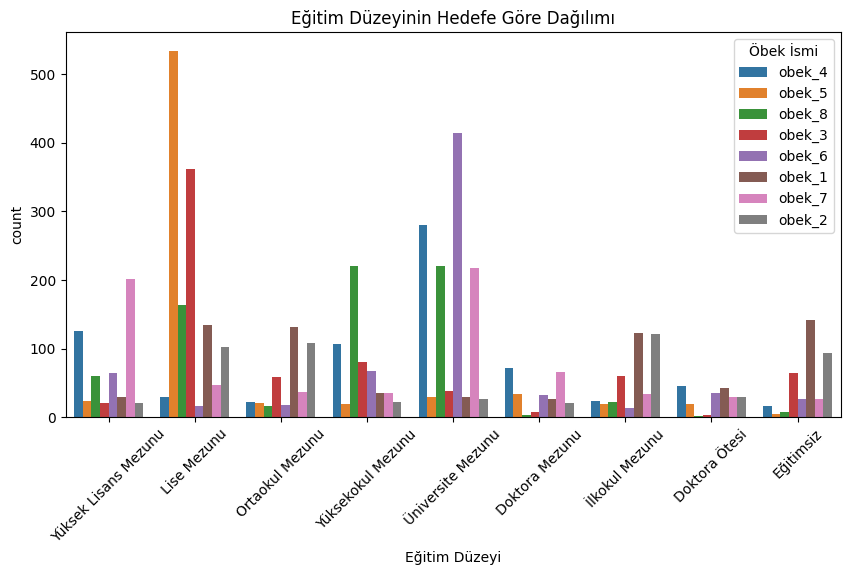

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(x=categorical_features[3], data=train_df, hue='Öbek İsmi')
plt.title(f'{categorical_features[3]}nin Hedefe Göre Dağılımı')
plt.xticks(rotation=45)
plt.show()

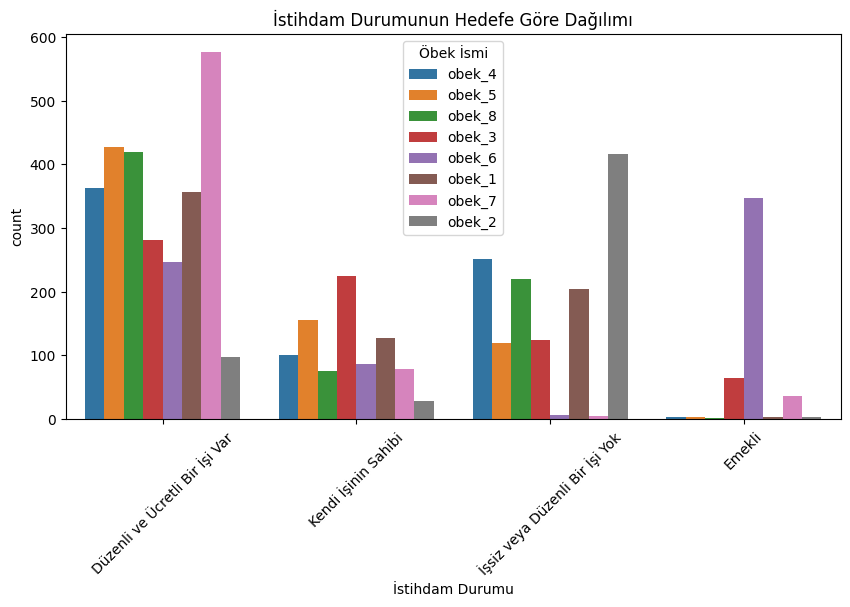

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(x=categorical_features[4], data=train_df, hue='Öbek İsmi')
plt.title(f'{categorical_features[4]}nun Hedefe Göre Dağılımı')
plt.xticks(rotation=45)
plt.show()

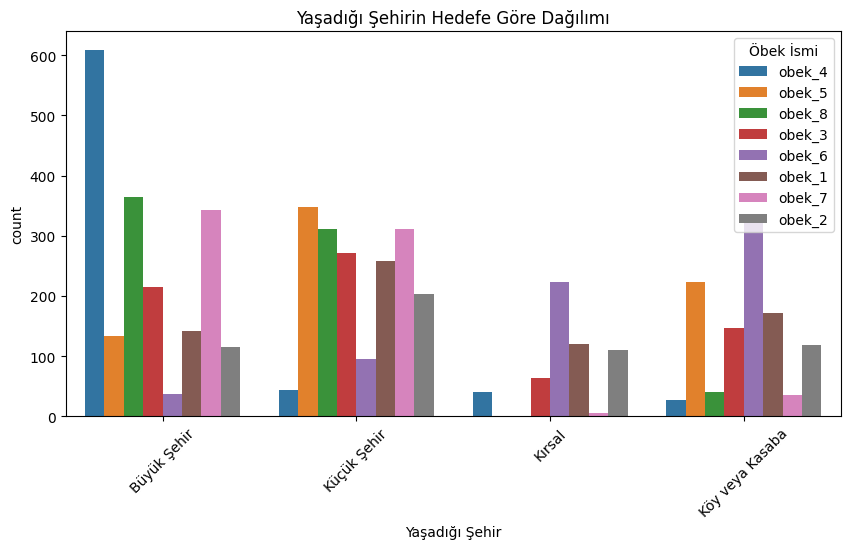

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(x=categorical_features[5], data=train_df, hue='Öbek İsmi')
plt.title(f'{categorical_features[5]}in Hedefe Göre Dağılımı')
plt.xticks(rotation=45)
plt.show()

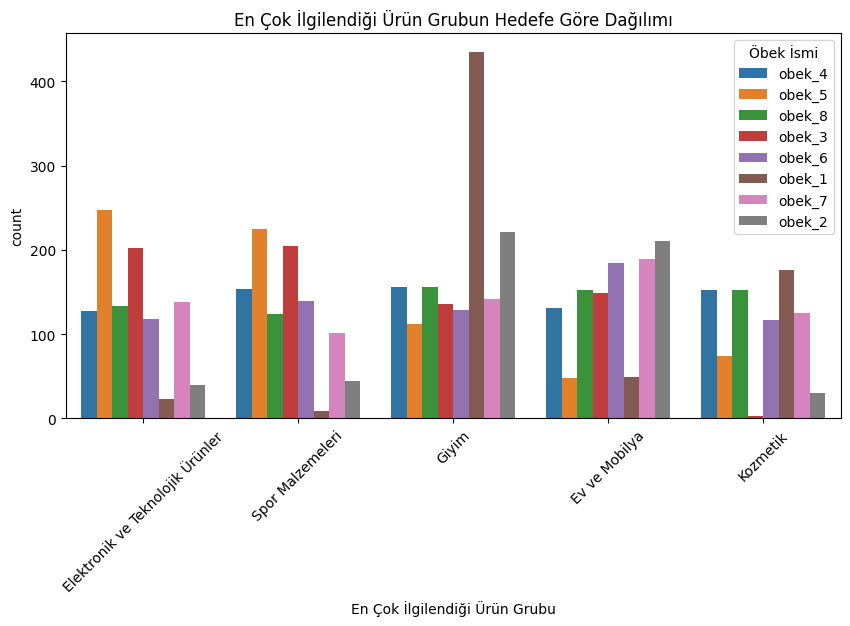

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(x=categorical_features[6], data=train_df, hue='Öbek İsmi')
plt.title(f'{categorical_features[6]}n Hedefe Göre Dağılımı')
plt.xticks(rotation=45)
plt.show()




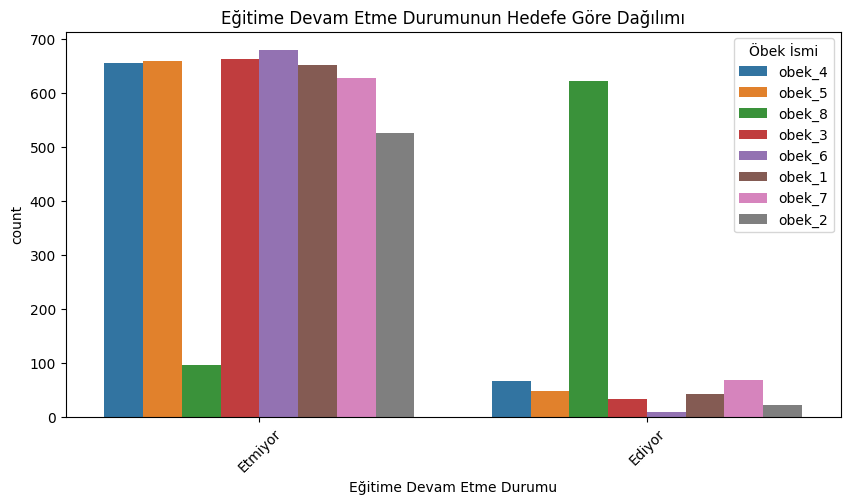

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(x=categorical_features[7], data=train_df, hue='Öbek İsmi')
plt.title(f'{categorical_features[7]}nun Hedefe Göre Dağılımı')
plt.xticks(rotation=45)
plt.show()

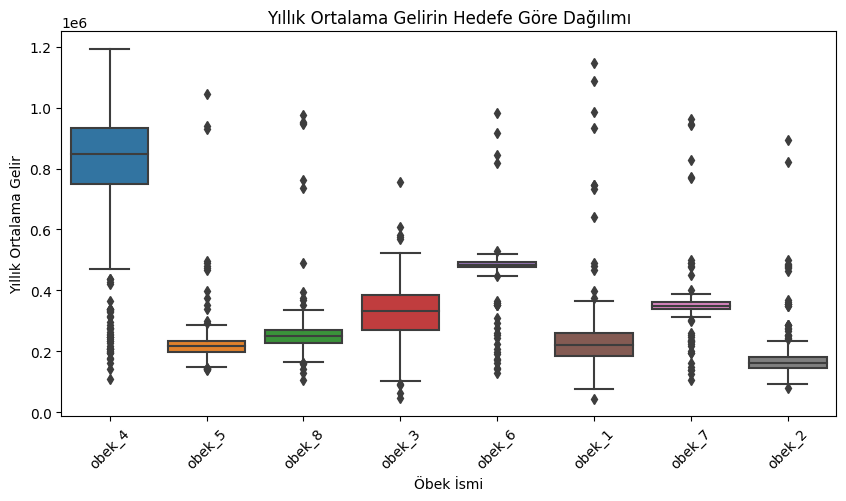

In [ ]:


numerical_features = ['Yıllık Ortalama Gelir', 'Yıllık Ortalama Satın Alım Miktarı', 'Yıllık Ortalama Sipariş Verilen Ürün Adedi', 'Yıllık Ortalama Sepete Atılan Ürün Adedi']

plt.figure(figsize=(10, 5))
sns.boxplot(x='Öbek İsmi', y=numerical_features[0], data=train_df)
plt.title(f'{numerical_features[0]}in Hedefe Göre Dağılımı')
plt.xticks(rotation=45)
plt.show()



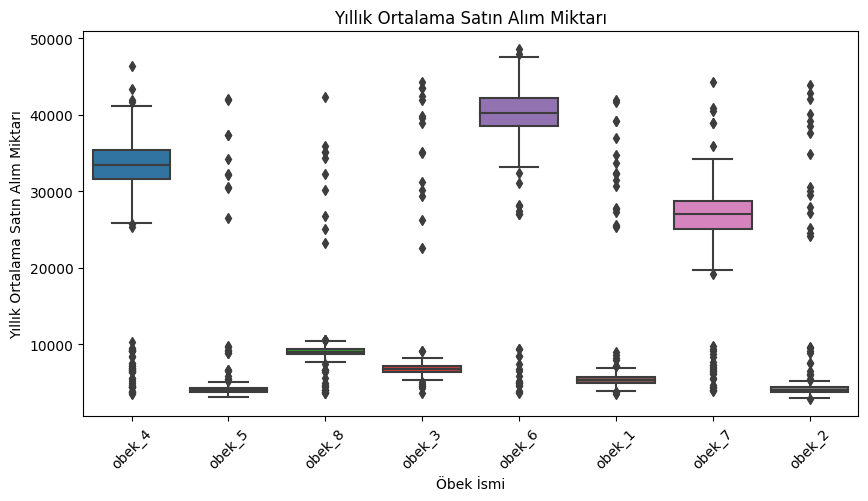

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='Öbek İsmi', y=numerical_features[1], data=train_df)
plt.title(f'{numerical_features[1]}')
plt.xticks(rotation=45)
plt.show()

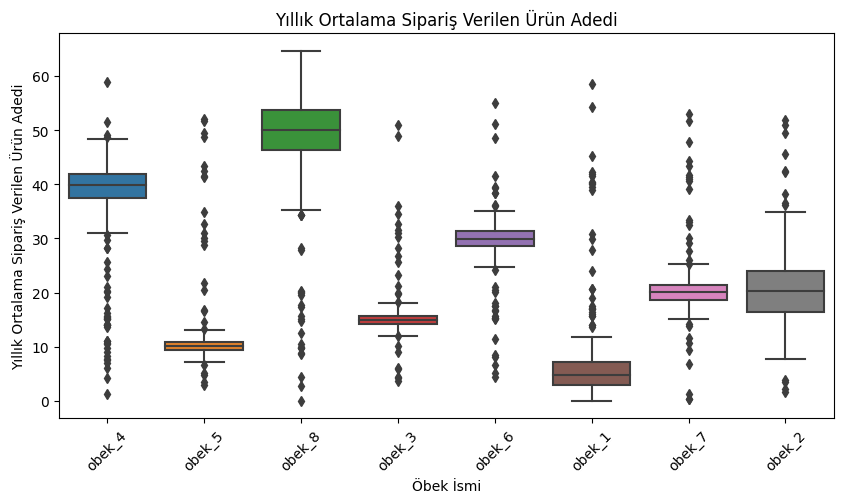

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='Öbek İsmi', y=numerical_features[2], data=train_df)
plt.title(f'{numerical_features[2]}')
plt.xticks(rotation=45)
plt.show()

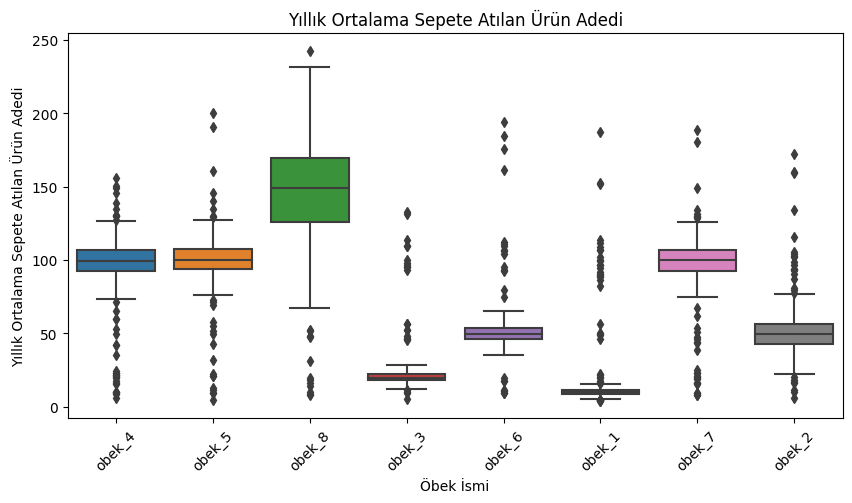

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='Öbek İsmi', y=numerical_features[3], data=train_df)
plt.title(f'{numerical_features[3]}')
plt.xticks(rotation=45)
plt.show()

# Öbekler

*   Öbek 1:
    Çoğunlukla lise veya daha az eğitim almışlar.
    İşsiz olanlar veya düzenli bir işi bulunmayanlar gelir seviyesi en düşük olanlar. Ancak bunlar herkes için geçerli değil.
    Giyim ve Kozmetik onların ilgi alanlarına giriyor.
    Gelirleri az olduğu için çok fazla alışveriş yapmıyorlar. Yaptıkları zaman da ucuz ürünleri tercih ediyorlar.
    - Temizlikçiler
    - Garsonlar
    - Kuryeler
    - Güvenlik Görevlileri
    - Satış Elemanları
*   Öbek 2:
    Çoğunlukla kadınlar ve yaklaşık %70'i lise veya daha altı eğitimli.
    Çoğunlukla evli % 77 oranında.
    Çoğunlukla işsiz veya düzenli bir işi yok.
    % 3.5'lik Erkekler bu grubun istisnasını oluşturuyor.
    - Çocuk Bakıcısı
    - Evde Üretim Yapanlar
    - Gönüllü Çalışanlar
    - Part-time Çalışanlar
    - Emekli Olanlar
*   Öbek 3:
    Çoğunlukla evli(%80) ve erkek(%90).
    %52'si lise mezunu ve geri kalanı da yüksek eğitim görmemiş.
    Yıllık Gelirleri orta düzeyde ama çok fazla alışveriş yapmıyorlar.
    Sepete attıklarını genellikle sipariş veren kişiler.
    Çoğunlukla şehirlerde yaşıyorlar(%70).
    - Kamyon Şoförleri
    - Esnaf
    - Öğretmenler
    - Memurlar
    - Teknikerler
*   Öbek 4:
    Çoğu bekar, kadın erkek dengeli ve neredeyse hepsi 18-40 yaş arasında.
    Büyük şehirlerde oturuyorlar ve iyi para kazanıyorlar.
    Alışveriş yapmayı seviyorlar.
    Eğitim durumları genellikle lisans veya üzeri.
    - Doktorlar
    - Avukatlar
    - Bilim İnsanları
    - Akademisyenler
    - Yöneticiler
*   Öbek 5:
    Çoğunluğu 18-40 yaş arası erkek olan bir grup.
    Gelirleri düşük ve kazandıklarının çok küçük bir kısmını harcıyorlar. Ama yine de sitede çok zaman geçiriyorlar çünkü sepete eklenen ürün sayısı 100 civarında.
    Küçük Şehirlerin ve kasabaların ağırlıkta olması onların fabrikalarda/üretimde çalıştıklarını akla getiriyor.
    
    - Kaynakçılar
    - Marangozlar
    - Tesisatçılar
    - Tamirciler
    - Madenciler
*   Öbek 6:
    Gelirleri orta-iyi düzeyde olan eğitimli emekliler.
    Her şeyden uzaklaşıp ege kasabalarına yerleşmişler.
    Gelirlerinin büyük bir kısmını harcıyorlar.
    
    - Bankacılar
    - Muhasebeciler
    - Gazeteciler
    - Yazarlar
    - Sanatçılar
*   Öbek 7:
    Yüksek lisans mezunu en çok olan grup ama maalesef yıllık ortalama gelirleri emeklilerden az.
    Emekliler gibi alışveriş yapmayı seviyorlar ama onlardan daha kararsızlar. Sepete 5 ürün ekleniyor ama 1 tanesi sipariş ediliyor.
    - Pazarlamacılar
    - İnsan Kaynakları Uzmanları
    - Danışmanlar
    - Programcılar
    - Tasarımcılar
*   Öbek 8:
    %97.2 si 18-30 yaş arasında olan ve %86'sı eğitimine devam eden Öğrenciler ve Yeni Mezunlar
    Çoğunluk bekar, çoğunluk yoksul.
    Sitede çok zaman geçirseler ve çok ürün alsalar bile indirim peşinde koştukları belli oluyor. Satın Alım miktarları az.
    Yıllık 600,000'den fazla kazananlar genellikle işsiz ve şehirde yaşıyorlar.
    - Stajyerler
    - Araştırma Görevlileri
    - Özel Ders Verenler
    - Freelancer Çalışanlar
    - Girişimciler




# Öz Nitelik Oluşturma



*   String yapıdaki verilerin birleştirilmesi ile yeni öz nitelikler oluşturdum
*   Satın_alım/sepet_oranı : Satın alınan ürünlerin sepete eklenen ürünlere oranı
*   Sipariş/sepet_oranı : Sipariş edilen ürünlerin sepete eklenen ürünlere oranı
*   Sipariş/satın_alım_oranı : Sipariş edilen ürünlerin satın alınan ürünlere oranı




1.   Test verisi için öz nitelik oluşturma
   



In [ ]:
# String veriler

test_df['NEW_istihdam_egitim'] = test_df['İstihdam Durumu'] + "_" + test_df['Eğitim Düzeyi']

test_df['NEW_cinsiyet_medeni'] = test_df['Cinsiyet'] + "_" + test_df['Medeni Durum']

test_df['NEW_yas_ilgi'] = test_df['Yaş Grubu'] + "_" + test_df['En Çok İlgilendiği Ürün Grubu']

test_df['NEW_sehir_yas'] = test_df['Yaşadığı Şehir'] + "_" + test_df['Yaş Grubu']

test_df['NEW_medeni_egitim'] = test_df['Medeni Durum'] + "_" + test_df['Eğitim Düzeyi']

test_df['NEW_istihdam_yas'] = test_df['İstihdam Durumu'] + "_" + test_df['Yaş Grubu']

test_df['NEW_ilgi_egitim'] = test_df['En Çok İlgilendiği Ürün Grubu'] + "_" + test_df['Eğitim Düzeyi']

#######################################################################################################################################################
# Sipariş/sepet_oranı

liste = []
for i in test_df["index"]:
    liste.append(test_df["Yıllık Ortalama Sipariş Verilen Ürün Adedi"][i] / test_df["Yıllık Ortalama Sepete Atılan Ürün Adedi"][i]  )

test_df["Sipariş/sepet_oranı"] = liste

#######################################################################################################################################################
# Satın_alım/sepet_oranı

liste = []
for i in test_df["index"]:
    liste.append(test_df["Yıllık Ortalama Satın Alım Miktarı"][i] / test_df["Yıllık Ortalama Sepete Atılan Ürün Adedi"][i]  )

test_df["Satın_alım/sepet_oranı"] = liste

#######################################################################################################################################################
# Sipariş/satın_alım_oranı

liste = []
for i in test_df["index"]:
    a = test_df["Yıllık Ortalama Sipariş Verilen Ürün Adedi"][i] / test_df["Yıllık Ortalama Satın Alım Miktarı"][i]
    liste.append(float(f"{a:.6f}"))

test_df["Sipariş/satın_alım_oranı"] = liste



2.   Train verisi için öz nitelik oluşturma



In [ ]:
# String veriler

train_df['NEW_istihdam_egitim'] = train_df['İstihdam Durumu'] + "_" + train_df['Eğitim Düzeyi']

train_df['NEW_cinsiyet_medeni'] = train_df['Cinsiyet'] + "_" + train_df['Medeni Durum']

train_df['NEW_yas_ilgi'] = train_df['Yaş Grubu'] + "_" + train_df['En Çok İlgilendiği Ürün Grubu']

train_df['NEW_sehir_yas'] = train_df['Yaşadığı Şehir'] + "_" + train_df['Yaş Grubu']

train_df['NEW_medeni_egitim'] = train_df['Medeni Durum'] + "_" + train_df['Eğitim Düzeyi']

train_df['NEW_istihdam_yas'] = train_df['İstihdam Durumu'] + "_" + train_df['Yaş Grubu']

train_df['NEW_ilgi_egitim'] = train_df['En Çok İlgilendiği Ürün Grubu'] + "_" + train_df['Eğitim Düzeyi']

#######################################################################################################################################################
# Sipariş/sepet_oranı

liste = []
for i in train_df["index"]:
    liste.append(train_df["Yıllık Ortalama Sipariş Verilen Ürün Adedi"][i] / train_df["Yıllık Ortalama Sepete Atılan Ürün Adedi"][i]  )

train_df["Sipariş/sepet_oranı"] = liste

#######################################################################################################################################################
# Satın_alım/sepet_oranı

liste = []
for i in train_df["index"]:
    liste.append(train_df["Yıllık Ortalama Satın Alım Miktarı"][i] / train_df["Yıllık Ortalama Sepete Atılan Ürün Adedi"][i]  )

train_df["Satın_alım/sepet_oranı"] = liste

#######################################################################################################################################################
# Sipariş/satın_alım_oranı

liste = []
for i in train_df["index"]:
    a =  train_df["Yıllık Ortalama Sipariş Verilen Ürün Adedi"][i]/train_df["Yıllık Ortalama Satın Alım Miktarı"][i]
    liste.append(float(f"{a:.6f}"))

train_df["Sipariş/satın_alım_oranı"] = liste

In [ ]:
# İndexler eğitim sonucunda test veri setimizi öbeklerle eşleştirmemiz için gerekli olduğu için ayrı bir değişkende tutulması sağlandı
submission_ids = test_df['index']


# İndex sütunu işimize yaramadığı için çıkardık
train_df.drop(columns=['index'], inplace=True)
test_df.drop(columns=['index'], inplace=True)



**Katagorik Verilerin LabelEncoder İle Sayısal Veriye Dönüştürülmesi**

In [ ]:
categorical_features = ['Cinsiyet', 'Yaş Grubu', 'Medeni Durum', 'Eğitim Düzeyi', 'İstihdam Durumu', 'Yaşadığı Şehir', 'En Çok İlgilendiği Ürün Grubu', 'Eğitime Devam Etme Durumu',"NEW_istihdam_egitim","NEW_cinsiyet_medeni","NEW_yas_ilgi","NEW_sehir_yas","NEW_medeni_egitim","NEW_istihdam_yas","NEW_ilgi_egitim"]


# Encoding Katagorik Veriler
label_encoders = {}
for column in categorical_features:
    le = LabelEncoder()

    train_df[column] = le.fit_transform(train_df[column])

    label_encoders[column] = le

# Encoding Katagorik Veriler
label_encoders = {}
for column in categorical_features:
    le = LabelEncoder()
    test_df[column] = le.fit_transform(test_df[column])
    label_encoders[column] = le

# Encoding Hedef Değerler
target_encoder = LabelEncoder()
train_df['Öbek İsmi'] = target_encoder.fit_transform(train_df['Öbek İsmi'])

In [ ]:
# İnput Ve Target Değerlerin Ayrırma
X = train_df.drop('Öbek İsmi', axis=1)
y = train_df['Öbek İsmi']

In [ ]:
# 3 Yöntemide denedim
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer

# veri setini belirli bir aralığa veya standart bir dağılıma göre değiştirerek ölçeklendirir. Bu, model performansını artırmak veya veri analizini kolaylaştırmak için yapılır.

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

test_data_scaled = scaler.transform(test_df)

# Submissions da Kullandığım Sınıflandırıcı

**RandomForestClassifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


random_state = 52
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y,test_size=0.11, random_state=random_state) # veri setini parçalar
clf = RandomForestClassifier(random_state=random_state, n_estimators=100,max_depth = 10) # parametrelerin başarıyı artırıp artırmadığı manuel olarak test edildi

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print(accuracy)

test_predictions = clf.predict(test_data_scaled)
test_predictions_labels = target_encoder.inverse_transform(test_predictions)


submission_df = pd.DataFrame({'id': submission_ids, 'Öbek İsmi': test_predictions_labels})
submission_df.to_csv('submission.csv', index=False)

0.9683860232945092


# Yüksek Başarı İçin Denediğim Diğer Yöntemler

**XGBClassifier**

In [ ]:
import xgboost as xgb
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix



model = xgb.XGBClassifier(n_estimators=100, max_depth=3, learning_rate=0.1, objective="binary:logitraw",eval_metric="logloss" ) # binary:logitraw   binary:logistic


model.fit(X_train, y_train)


y_pred = model.predict(X_test)


acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
print("Accuracy:", acc)

Accuracy: 0.9667221297836939


**KNeighborsClassifier**

In [ ]:
import pandas
egitim_verisi=pandas.read_csv("train.csv")
test_verisi=pandas.read_csv("test_x.csv")

egitim_verisi["Cinsiyet"] =egitim_verisi["Cinsiyet"].replace(["Erkek"],1)
egitim_verisi["Cinsiyet"] =egitim_verisi["Cinsiyet"].replace(["Kadın"],0)

egitim_verisi = pandas.get_dummies(egitim_verisi, columns=['Yaş Grubu','Medeni Durum','Eğitim Düzeyi','Yaşadığı Şehir', 'İstihdam Durumu','Eğitime Devam Etme Durumu', 'En Çok İlgilendiği Ürün Grubu'])



test_verisi["Cinsiyet"] =test_verisi["Cinsiyet"].replace(["Erkek"],1)
test_verisi["Cinsiyet"] =test_verisi["Cinsiyet"].replace(["Kadın"],0)
test_verisi = pandas.get_dummies(test_verisi, columns=['Yaş Grubu','Medeni Durum','Eğitim Düzeyi','Yaşadığı Şehir', 'İstihdam Durumu','Eğitime Devam Etme Durumu', 'En Çok İlgilendiği Ürün Grubu'])


eğitim = egitim_verisi.copy()
eğitim =  eğitim.drop ('Öbek İsmi', axis=1)


egitim_verisi_hedefsiz= egitim_verisi.drop(['Öbek İsmi'], axis=1)
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=5,p = 2,algorithm = 'auto') # 'ball_tree', 'kd_tree', 'brute'
model.fit(egitim_verisi_hedefsiz,egitim_verisi["Öbek İsmi"])
tahmin_sonuclari = model.predict(eğitim) # test_verisi , eğitim
print(tahmin_sonuclari)

c = 0
for index, row in egitim_verisi.iterrows ():
    #print (row ["Öbek İsmi"])
    if row["Öbek İsmi"] == tahmin_sonuclari[index]:
        c+=1

print((c*100)/5460)

veri = {
    'id': range(5460),   # 2340 ,5460
    'Öbek İsmi': tahmin_sonuclari
}
Tahmin_Dataframe = pandas.DataFrame(veri)
Tahmin_Dataframe.set_index('id', inplace=True)


['obek_4' 'obek_5' 'obek_8' ... 'obek_1' 'obek_8' 'obek_8']
87.82051282051282


**LGBMClassifier**

In [ ]:
from lightgbm import LGBMClassifier

clf = LGBMClassifier(n_estimators=100, max_depth=3, learning_rate=0.1)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
accuracy

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001316 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1986
[LightGBM] [Info] Number of data points in the train set: 4859, number of used features: 22
[LightGBM] [Info] Start training from score -2.076770
[LightGBM] [Info] Start training from score -2.304439
[LightGBM] [Info] Start training from score -2.068593
[LightGBM] [Info] Start training from score -2.005481
[LightGBM] [Info] Start training from score -2.058868
[LightGBM] [Info] Start training from score -2.081708
[LightGBM] [Info] Start training from score -2.042868
[LightGBM] [Info] Start training from score -2.025558
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive

0.9683860232945092

**Pytorch**



*   CNN modelim için veri seti oluşturma




In [ ]:
import os
import csv
from PIL import Image
import pandas as pd
import numpy as np

modes = [ "test_x" , "train"]

for mode in modes:


    # dönüştürülmüş verilerin kaydedileceği CSV dosyası adı
    csv_file_name = f'datathon_{mode}.csv'



    with open(csv_file_name, mode='w', newline='') as csv_file:
        csv_writer = csv.writer(csv_file)

        while True:

            with open(f'{mode}.csv', 'r', encoding='utf-8') as csv_dosya:
                csv_okuyucu = csv.reader(csv_dosya, delimiter=',')

                start = 0

                for satir in csv_okuyucu:

                    if start == 0:
                        start+=1
                    else:
                        encode = []

                        encode.append(int(satir[0]))

                        if mode == "train":
                          if satir[12] == "obek_1":
                              encode.extend([1, 0, 0, 0, 0, 0, 0, 0])

                          elif satir[12] == "obek_2":
                              encode.extend([0, 1, 0, 0, 0, 0, 0, 0])

                          elif satir[12] == "obek_3":
                              encode.extend([0, 0, 1, 0, 0, 0, 0, 0])

                          elif satir[12] == "obek_4":
                              encode.extend([0, 0, 0, 1, 0, 0, 0, 0])

                          elif satir[12] == "obek_5":
                              encode.extend([0, 0, 0, 0, 1, 0, 0, 0])

                          elif satir[12] == "obek_6":
                              encode.extend([0, 0, 0, 0, 0, 1, 0, 0])

                          elif satir[12] == "obek_7":
                              encode.extend([0, 0, 0, 0, 0, 0, 1, 0])

                          elif satir[12] == "obek_8":
                              encode.extend([0, 0, 0, 0, 0, 0, 0, 1])

                        if satir[1] == "Kadın":
                            encode.extend([1, 0])
                        elif satir[1] == "Erkek":
                            encode.extend([0, 1])

                        if satir[2] == "18-30":
                            encode.extend([1, 0, 0, 0, 0])
                        elif satir[2] == "31-40":
                            encode.extend([0, 1, 0, 0, 0])
                        elif satir[2] == "51-60":
                            encode.extend([0, 0, 1, 0, 0])
                        elif satir[2] == "41-50":
                            encode.extend([1, 0, 0, 1, 0])
                        elif satir[2] == ">60":
                            encode.extend([0, 0, 0, 0, 1])

                        if satir[3] == "Evli":
                            encode.extend([1, 0])
                        elif satir[3] == "Bekar":
                            encode.extend([0, 1])

                        if satir[4] == "Lise Mezunu":
                            encode.append(0)
                        elif satir[4] == "Üniversite Mezunu":
                            encode.append(1)
                        elif satir[4] == "Yüksekokul Mezunu":
                            encode.append(2)
                        elif satir[4] == "Yüksek Lisans Mezunu":
                            encode.append(3)
                        elif satir[4] == "İlkokul Mezunu":
                            encode.append(4)
                        elif satir[4] == "Ortaokul Mezunu":
                            encode.append(5)
                        elif satir[4] == "Eğitimsiz":
                            encode.append(6)
                        elif satir[4] == "Doktora Mezunu":
                            encode.append(7)
                        elif satir[4] == "Doktora Ötesi":
                            encode.append(8)

                        if satir[5] == "Düzenli ve Ücretli Bir İşi Var":
                            encode.extend([1, 0, 0, 0])
                        elif satir[5] == "İşsiz veya Düzenli Bir İşi Yok":
                            encode.extend([0, 1, 0, 0])
                        elif satir[5] == "Kendi İşinin Sahibi":
                            encode.extend([0, 0, 1, 0])
                        elif satir[5] == "Emekli":
                            encode.extend([0, 0, 0, 1])

                        encode.append(float(satir[6]))


                        if satir[7] == "Büyük Şehir":
                            encode.extend([1, 0, 0, 0])
                        elif satir[7] == "Küçük Şehir":
                            encode.extend([0, 1, 0, 0])
                        elif satir[7] == "Köy veya Kasaba":
                            encode.extend([0, 0, 1, 0])
                        elif satir[7] == "Kırsal":
                            encode.extend([0, 0, 0, 1])


                        if satir[8] == "Giyim":
                            encode.append(0)
                        elif satir[8] == "Ev ve Mobilya":
                            encode.append(1)
                        elif satir[8] == "Elektronik ve Teknolojik Ürünler":
                            encode.append(2)
                        elif satir[8] == "Spor Malzemeleri":
                            encode.append(3)
                        elif satir[8] == "Kozmetik":
                            encode.append(4)

                        encode.append(float(satir[9]))

                        encode.append(float(satir[10]))

                        if satir[11] == "Etmiyor":
                            encode.extend([1, 0])
                        elif satir[11] == "Ediyor":
                            encode.extend([0, 1])

                        idx = 12
                        if mode == "train":
                          idx = 13
                        encode.append(float(satir[idx])) # 13 : train  12 : test

                        csv_writer.writerow(encode)
            break





*   Veri seti dataloader için kullanılabilir hale getiriliyor




In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader
import numpy as np

# Train Veri Seti
class data3D(Dataset):
    def __init__(self):
        data = np.loadtxt('datathon_train.csv', delimiter=',')
        self.veriler = data[:, 9:]
        self.hedefler = data[:, 1:9]


    def __len__(self):
        return len(self.veriler)

    def __getitem__(self, idx):


        veri = torch.tensor(self.veriler[idx].reshape(1,5, 5)).float()


        veri = torch.stack([veri,veri,veri],0) # Daha önceki projelerimde 1 kanal veriyi 3 kanal olarak gönderince başarı artmıştı

        hedef = torch.tensor(self.hedefler[idx]).float()


        return veri, hedef

# Test Veri Seti
class dataT3D(Dataset):
    def __init__(self):
        data = np.loadtxt('datathon_test_x.csv', delimiter=',')
        self.veriler = data[:, 1:]
        self.hedefler = data[:, 0:1]


    def __len__(self):
        return len(self.veriler)

    def __getitem__(self, idx):


        veri = torch.tensor(self.veriler[idx].reshape(1,5, 5)).float()


        veri = torch.stack([veri,veri,veri],0)

        hedef = torch.tensor(self.hedefler[idx]).float()


        return veri, hedef



*   CNN modelim




In [ ]:
import torch.nn as nn

class Network3D(nn.Module):  # %72 3D model
    def __init__(self):
        super().__init__()

        self.conv1 = nn.Conv3d(3,30,kernel_size=(1, 1, 1))
        self.pool1 = nn.AvgPool3d(kernel_size=(1,1,1),stride=(1,1,1))
        self.bn1 = nn.BatchNorm3d(30)

        p = 0.5


        self.conv2 = nn.Conv3d(30,60,kernel_size=(1,1,1))
        self.bn2 = nn.BatchNorm3d(60)
        self.conv2_drop = nn.Dropout3d(p)
        self.pool2 = nn.AvgPool3d(kernel_size=(1,1,1),stride=(1,1,1))


        self.fc1 = nn.Linear(1500, 100)
        self.drop = nn.Dropout(p)
        self.fc2 = nn.Linear(100, 8)


    def forward(self, x):

        x = self.conv1(x)
        x = self.bn1(x)
        x = torch.relu(x)
        x = self.pool1(x)

        x = self.conv2(x)
        x = self.bn2(x)
        x = torch.relu(x)
        x = self.pool2(x)

        x = x.view(-1, 1500)

        x = self.fc1(x)
        x = torch.relu(x)
        x = self.drop(x)

        x = self.fc2(x)


        return torch.log_softmax(x, dim=1)



*   Eğitim aşaması




In [ ]:
import torch
import torchvision
from torch.utils.data import Dataset, DataLoader ,random_split# giriş versi bununla yapılır
import torch.optim as opt
import torch.nn.functional as F
import numpy as np


import time
import torch.optim as optim

import matplotlib.pyplot as plt


if __name__=="__main__":

    lossL = []
    train_Accuracy = []
    n_epochs = 120
    batchSizeTrain = 64
    batchSizeTest = 64
    #device = "cuda"
    device = "cpu"

    trainLoader = DataLoader(data3D(), batch_size=batchSizeTrain, shuffle=True)
    testLoader = trainLoader


    myModel=Network3D().to(device)

    lr_list = []
    lr1 = 0.005

    # Parametreler manuel olarak test edildi , fakat %85 üstü başarı elde edemedim

    optimizer = torch.optim.RMSprop(myModel.parameters(), lr=lr1, alpha=0.99, eps=1e-008, momentum=0.9, weight_decay=0.00002)
    scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=40, threshold=0.01, min_lr=1e-30, verbose=True) # Learning Rate Güncelleme


    timer_counter = 0
    myModel.train()
    for e in range(n_epochs):
        print(e+1)

        if timer_counter == 0:
            start = time.time()

        son = 0
        for batch,target in trainLoader:


            optimizer.zero_grad()

            o=myModel.forward(batch.to(device))

            loss = F.cross_entropy(o,torch.argmax(target, dim=1).to(device) ,label_smoothing= 0.1)

            lossL.append(loss)
            loss.backward()
            optimizer.step()

        with torch.no_grad():
            for batch,target in trainLoader:

                val_output = myModel.forward(batch.to(device))
                val_loss = F.cross_entropy(val_output, torch.argmax(target, dim=1).to(device))
                break

        scheduler.step(val_loss)


        correct = 0
        for batch,target in testLoader:

                o=myModel.forward(batch.to(device))

                pred = o.data.max(1, keepdim=True)[1]

                correct += pred.eq(torch.argmax(target, dim=1).to(device).data.view_as(pred)).sum()


        train_Accuracy.append(correct)

        if timer_counter == 0:
            print(time.time() - start)
            timer_counter+=1

    correct_g = []

    myModel.eval()
    testLoss = 0
    correct = 0
    for batch,target in testLoader:

            o=myModel.forward(batch.to(device))

            pred = o.data.max(1, keepdim=True)[1]


            correct += pred.eq(torch.argmax(target, dim=1).to(device).data.view_as(pred)).sum()
            correct_g.append(pred.eq(torch.argmax(target, dim=1).to(device).data.view_as(pred)).sum()*100. / 1000)
    testLoss /= len(testLoader.dataset)


    print('\nTest set: Accuracy: {}/{} ({:.0f}%)\n'.format(
        correct, len(testLoader.dataset),
        100. * correct / len(testLoader.dataset)))



    torch.save(myModel.state_dict(), 'nice.pth')

    # loss ve accuracy gidişatlarını gözlemleyebilmek için grafik oluşturma
    from torch.utils.tensorboard import SummaryWriter
    writer = SummaryWriter()

    for n_iter in range(len(train_Accuracy)):

        writer.add_scalar('Accuracy/train', train_Accuracy[n_iter], n_iter)

    for n_iter in range(len(train_Accuracy)):

        writer.add_scalar('Loss/train', lossL[n_iter], n_iter)






1
1.4031012058258057
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
Epoch 00081: reducing learning rate of group 0 to 5.0000e-04.
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120

Test set: Accuracy: 4464/5460 (82%)



**Öbek İsimlerinin Kaydedilmesi**

In [ ]:
import torch
import torchvision
from torch.utils.data import Dataset, DataLoader
import torch.optim as opt
import torch.nn.functional as F
import numpy as np
import time
import torch.optim as optim
import matplotlib.pyplot as plt


if __name__=="__main__":

    lossL = []

    batchSizeTest = 1
    device = "cpu"

    testLoader = DataLoader(dataT3D(), batch_size=batchSizeTest, shuffle=False)
    myModel=Network3D().to(device)
    myModel.load_state_dict(torch.load('nice.pth'))

    sonuc = []

    correct_g = []

    myModel.eval()
    testLoss = 0
    correct = 0
    for batch,target in testLoader:

            o=myModel.forward(batch.to(device))

            pred = o.data.max(1, keepdim=True)[1]
            sonuc.append(pred[0][0])  # öbek indexleri sonuc listesine eklenir



    print(sonuc)
    import csv
    csv_file_name = 'cnn2.csv'


    # CSV dosyasını oluştur
    with open(csv_file_name, mode='w', newline='', encoding="utf-8") as csv_file:
        csv_writer = csv.writer(csv_file)
        index = 0
        csv_writer.writerow(["id","Öbek İsmi"])
        for i in sonuc:

            satır = [index]
            index+=1

            if i == 0:
                satır.append("obek_1")
            elif i == 1:
                satır.append("obek_2")
            elif i == 2:
                satır.append("obek_3")
            elif i == 3:
                satır.append("obek_4")
            elif i == 4:
                satır.append("obek_5")
            elif i == 5:
                satır.append("obek_6")
            elif i == 6:
                satır.append("obek_7")
            elif i == 7:
                satır.append("obek_8")

            csv_writer.writerow(satır)



[tensor(2), tensor(2), tensor(1), tensor(5), tensor(2), tensor(1), tensor(0), tensor(7), tensor(6), tensor(7), tensor(5), tensor(6), tensor(7), tensor(3), tensor(3), tensor(7), tensor(6), tensor(7), tensor(3), tensor(6), tensor(7), tensor(4), tensor(6), tensor(6), tensor(3), tensor(5), tensor(7), tensor(5), tensor(7), tensor(0), tensor(1), tensor(0), tensor(7), tensor(4), tensor(1), tensor(2), tensor(6), tensor(4), tensor(6), tensor(5), tensor(1), tensor(1), tensor(7), tensor(4), tensor(4), tensor(3), tensor(5), tensor(6), tensor(2), tensor(3), tensor(5), tensor(3), tensor(2), tensor(1), tensor(1), tensor(0), tensor(4), tensor(4), tensor(6), tensor(6), tensor(6), tensor(6), tensor(5), tensor(4), tensor(3), tensor(7), tensor(3), tensor(5), tensor(2), tensor(6), tensor(3), tensor(5), tensor(4), tensor(4), tensor(0), tensor(4), tensor(3), tensor(4), tensor(1), tensor(7), tensor(7), tensor(0), tensor(3), tensor(4), tensor(1), tensor(7), tensor(4), tensor(4), tensor(6), tensor(5), tensor(5)